In [24]:
import os

from src.data_processing.data_loader import DataLoader
data_path=os.environ.get('DATA_PATH')

data=DataLoader(data_path,bf=True).pre_process()
data['attribute'].value_counts()

Loaded data from cache: merged_data.pkl


Clip vorhanden                                              2061
Mine auswechselbar                                          1895
refill                                                      1643
rebuilt                                                     1639
kann einige Tage offen liegen bleiben ohne einzutrocknen    1510
                                                            ... 
mehrfach beschreibbar                                         12
Organisationsaufdruck vorhanden                               12
farbig hinterlegte Winkelgrade vorhanden                      12
dermatologisch getestet                                       10
Stempelkissen austauschbar                                    10
Name: AttributeKey, Length: 138, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from src.baselines.decision_tree_classifier import AttributeClassifier

attribute_metrics = {}

for attribute_key in data['attribute'].unique():
    df = data.query("`attribute` == @attribute_key")
    attribute_classifier = AttributeClassifier(df)
    X, y = attribute_classifier.preprocess_data()
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    except:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=None)

    attribute_classifier.train_model(X_train, y_train)

    y_pred = attribute_classifier._predict(X_test)
    evaluation_metrics = attribute_classifier.evaluate_model(y_test, y_pred)

    y_train_pred = attribute_classifier._predict(X_train)
    training_metrics = attribute_classifier.evaluate_model(y_train, y_train_pred)

    attribute_metrics[attribute_key] = {
        'training_metrics': training_metrics,
        'evaluation_metrics': evaluation_metrics,
        'attribute_classifier': attribute_classifier
    }

Batterien im Lieferumfang enthalten
Drucker
Farbdruck vorhanden
Fax vorhanden
Kopierer vorhanden
Netzwerk vorhanden
Scanner vorhanden
rebuilt
refill
Chip vorhanden
mehrfach beschreibbar
Beschriftungsschild vorhanden
selbstklebend
Handgelenkauflage vorhanden
rutschfest
Antistatikfilter vorhanden
Strahlungsfilter vorhanden
Folienauflage vorhanden
Kalender vorhanden
recycelbar
Klammer vorhanden
Deckel vorhanden
drehbar


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

Anschlagschiene vorhanden
REACH-Kennzeichnungspflichtig
sicherheitsdatenblattpflichtig
Klemmfeder vorhanden
Stempelkissen austauschbar
dokumentenecht
Netzanschluss vorhanden
Lackierung auf Wasserbasis gegeben
Radierer auswechselbar
Radierer vorhanden
Schaft lackiert
Clip vorhanden
ISO-Kennzeichnung vorhanden
Mine auswechselbar
Mine federnd gelagert
Spitze voll versenkbar
Technik zur Minenrestreduzierung vorhanden
kann einige Tage offen liegen bleiben ohne einzutrocknen
wasserfest
Kolbentankkonverter verwendbar
Sicherheitsdatenblattpflichtig
auswaschbar


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Spitze austauschbar
Spitze druckgesichert
kann einige Tage offen liegen bleiben, ohne einzutrocknen
wischfest
Druckmechanik vorhanden
Kappe umsteckbar
feucht abwischbar
inkjet geeignet
schattenfrei kopierbar
Lochverschluss vorhanden
Messer austauschbar
Spitzer austauschbar
Kombiradierer
wasservermalbar
nahtlose Pinselzwinge vorhanden


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Griff vorhanden
Millimeterfacette auf beiden Seiten
mm-Facette farbig unterlegt
farbig hinterlegte Winkelgrade vorhanden
Seitenzahl vorhanden
austauschbare Kopfleiste vorhanden
perforiert
beidseitig bedruckbar
Abheftlochung vorhanden
beidseitig Druck/Motiv vorhanden


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

radierfest
Fenster vorhanden
Innendruck vorhanden
Seidenfutter vorhanden
selbstdurchschreibend
Seitenzahlen vorhanden
abgerundete Ecken vorhanden
umlaufender Rand vorhanden
Perforation zum Trennen vorhanden
Deckblatt vorhanden
Griffloch vorhanden
Kantenschutz vorhanden
Schlitze vorhanden
Beschriftungsschild auswechselbar
Aufdruck vorhanden
Organisationsaufdruck vorhanden
Archivdruck vorhanden
Griffloch/Griffmulde vorhanden
Lieferung gefaltet
Beschriftungsfeld vorhanden
Greifausschnitt vorhanden
stapelbar
Auszugsperre vorhanden
3 Klappen (Jurisklappen) am Unterdeckel vorhanden
Abheftvorrichtung vorhanden
Einstecktasche vorhanden
Sichttasche auf dem Vorderdeckel vorhanden
beweglicher Heftfalz vorhanden
transparenter Vorderdeckel vorhanden
Blattniederhalter vorhanden
Papiereinlage vorhanden
Kantenklebung vorhanden
Schloss vorhanden
Ablageschale vorhanden


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

Tafel beschreibbar
Tafel magnethaftend
Lenkrolle feststellbar
Lenkrollen feststellbar
Raster vorhanden
beidseitig beschreibbar
beidseitig verwendbar
beschriftbar
zusammenklappbar
magnethaftend
Telefon-/Adressverzeichnis vorhanden
neigbare Tragplatte vorhanden
Konzepthalter vorhanden
Tastatureinschub/Tastaturfach vorhanden
Neigungsverstellung vorhanden
Armlehne verstellbar
Gleiter vorhanden
Ablage vorhanden
Doppelnulltaste vorhanden
Druckausgabe vorhanden
Rundungsautomatik vorhanden
Tausenderunterteilung vorhanden
Kabel inbegriffen
Schneidevorrichtung vorhanden
auswechselbarer Messerkopf vorhanden
Klappe vorhanden


C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

reflektierend
Vordruck vorhanden
transparent
dermatologisch getestet
Boden vorhanden
Passepartouteinleger vorhanden
Rahmen vorhanden
Schultergurt vorhanden
Attribute Key: Batterien im Lieferumfang enthalten
Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Evaluation Metrics: {'Accuracy': 0.8157894736842105, 'Precision': 0.84375, 'Recall': 0.9310344827586207, 'F1 Score': 0.8852459016393444}
Attribute Key: Drucker
Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Evaluation Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Attribute Key: Farbdruck vorhanden
Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Evaluation Metrics: {'Accuracy': 0.8, 'Precision': 1.0, 'Recall': 0.75, 'F1 Score': 0.8571428571428571}
Attribute Key: Fax vorhanden
Training Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Evaluation Metrics: {'Accuracy': 

C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

In [60]:
import json
metrics = {key: {'training_metrics':values['training_metrics'],'eval_metrics':values['evaluation_metrics']}for key, values in attribute_metrics.items()}
with open("decision_tree",'w') as file:
    json.dump(metrics,file)


In [26]:
feature_importance_all={}
difference={}
importance1=[]
importance2=[]
for attribute_key, metrics_dict in attribute_metrics.items():
    attribute_classifier=metrics_dict['attribute_classifier']
    feature_names = attribute_classifier.vectorizer.get_feature_names()
    feature_importances = attribute_classifier.decision_stump.feature_importances_
    important_features = dict(zip(feature_names, feature_importances))
    top_features = dict(sorted(important_features.items(), key=lambda item: item[1], reverse=True))
    top_2_features = dict(list(top_features.items())[:2])
    feature_importance_all[attribute_key]=top_2_features
    importance_values=list(top_2_features.values())
    importance1.append(importance_values[0])
    importance2.append(importance_values[1])
    difference[attribute_key]=importance_values[0]-importance_values[1]

In [27]:
keys_dict={}
for attribute_key in list(feature_importance_all.keys()):
    keys_dict[attribute_key]=list(feature_importance_all[attribute_key].keys())

In [28]:
sum(list(difference.values()))/len([val for val in list(difference.values()) if val!=0])

0.5017570653612726

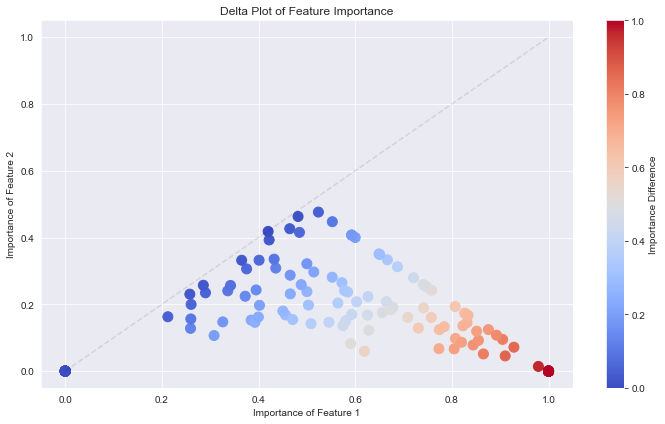

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


attributes =  list(feature_importance_all.keys())

importance_difference = list(difference.values())


plt.figure(figsize=(10, 6))
plt.scatter(importance1, importance2, c=importance_difference, cmap='coolwarm', s=100, marker='o')
plt.colorbar(label='Importance Difference')
plt.xlabel('Importance of Feature 1')
plt.ylabel('Importance of Feature 2')
plt.title('Delta Plot of Feature Importance')
plt.grid(True)
plt.plot([0, 1], [0, 1], color='black', linestyle='--',alpha=0.1)

plt.tight_layout()
plt.savefig('FI_DT.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from src.baselines.decision_tree_classifier import AttributeClassifier
df=data.query("`AttributeKey`=='dokumentenecht'")
attribute_classifier = AttributeClassifier(df)
X, y = attribute_classifier.preprocess_data()
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
except:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=None)
attribute_classifier.train_model(X_train,y_train)
y_pred=attribute_classifier._predict(X_test)
evaluation_metrics = attribute_classifier.evaluate_model(y_test,y_pred)
y_train_pred = attribute_classifier._predict(X_train)
training_metrics = attribute_classifier.evaluate_model(y_train, y_train_pred)
print("Training Metrics:", training_metrics)
print("Evaluation Metrics:", evaluation_metrics)



Training Metrics: {'Accuracy': 0.9948078920041536, 'Precision': 1.0, 'Recall': 0.9870466321243523, 'F1 Score': 0.9934810951760104}
Evaluation Metrics: {'Accuracy': 0.9467312348668281, 'Precision': 0.9675324675324676, 'Recall': 0.8975903614457831, 'F1 Score': 0.9312499999999999}


In [45]:
feature_names = attribute_classifier.vectorizer.get_feature_names()
feature_importances = attribute_classifier.decision_stump.feature_importances_
important_features = dict(zip(feature_names, feature_importances))
#print("Feature Importance:", important_features)
top_features = dict(sorted(important_features.items(), key=lambda item: item[1], reverse=True))
top_10_data = dict(list(top_features.items())[:10])
print(top_10_data)

{'dokumentenecht': 0.5914266062156265, 'parker': 0.08241461469252671, 'ist': 0.06598341707079877, 'pilot': 0.057478272210773965, 's20p': 0.02792225207769793, 'rollerball': 0.025796216605705306, 'tintenroller': 0.015977285892874834, 'farbe': 0.015669622301615806, 'format': 0.012833194106009447, 'airpress': 0.012782115253383429}


Data Issues: If the data has little or no discriminatory power for the target variable, the decision tree might not find any features that significantly contribute to the classification.

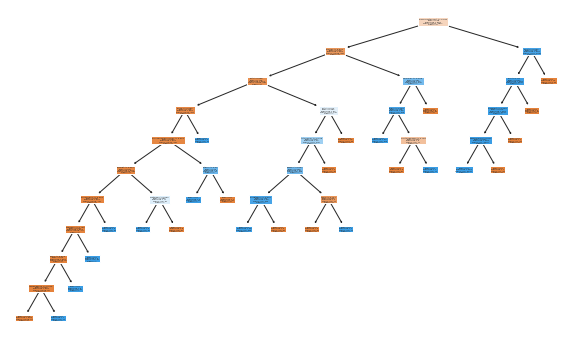

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(attribute_classifier.decision_stump, feature_names=feature_names, filled=True, class_names=['0', '1'])
plt.show()



In [47]:
from sklearn.tree import export_text
tree_rules = export_text(attribute_classifier.decision_stump, feature_names=feature_names)
print(tree_rules)

|--- dokumentenecht <= 0.03
|   |--- parker <= 0.03
|   |   |--- ist <= 0.06
|   |   |   |--- s20p <= 0.09
|   |   |   |   |--- druckkugelschreiber <= 0.05
|   |   |   |   |   |--- format <= 0.05
|   |   |   |   |   |   |--- schreibens <= 0.10
|   |   |   |   |   |   |   |--- airpress <= 0.16
|   |   |   |   |   |   |   |   |--- büro <= 0.08
|   |   |   |   |   |   |   |   |   |--- reisepässen <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- reisepässen >  0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- büro >  0.08
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- airpress >  0.16
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- schreibens >  0.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- format >  0.05
|   |   |   |   |   |   |--- material <= 0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   

In [43]:
new_description = "'Feinminenstift Tikky 0,7mm sortiert   im Display ROTRING 2010022 Feinminenstift Tikky STANDARD NEON, Ausführung: Mine auswechselbar, Material des Schaftes: Dreikantiges leichter Kunststoffschaft, Ausführung der Griffzone: Softtouch, Metall , Clip nicht vorhanden Stärke der Mine 0,7mm'"
predicted_value = attribute_classifier.predict(new_description)
print("Predicted Attribute Value:", predicted_value)


Predicted Attribute Value: 1
